# <font color="#4682B4"> BAD DAY 2: Dimensionality reduction  </font>

# 1. PCA
(for more examples see http://manuals.bioinformatics.ucr.edu/home/R_BioCondManual )

Principal Component Analysis (PCA) is a data reduction technique that allows to simplify multidimensional data sets to alower dimensional space ( tipically using 2 or 3 dimensions)for a first broad visual analysis of the data (via plotting and visual variance analysis). 

The `prcomp( )` and `princomp( )` R functions are devoted to PCA. 

The BioConductor library `pcaMethods` provides many additional PCA functions.  

We are going to use the IRIS data set to demonstrate the use of PCA.

This data was used to show that these measurements could be used to differentiate between species of irises. 

This data set contains the sepal/petal length and width measurements in centimeters for 50 flowers from each of 3 species of iris. 

The Iris species are:  **setosa, versicolor, and virginica.**


In [1]:
# Setting the working directory
bad2dir= getwd()
setwd(bad2dir)
getwd()

[1] "/Volumes/apilolli/tania/Documents/Git_Repos/BAD_days/Day2/BAD_DAY2"

In [2]:
# Loading the data and getting a summary
data(iris)
str(iris); 
summary(iris[1:4])

#dim(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  

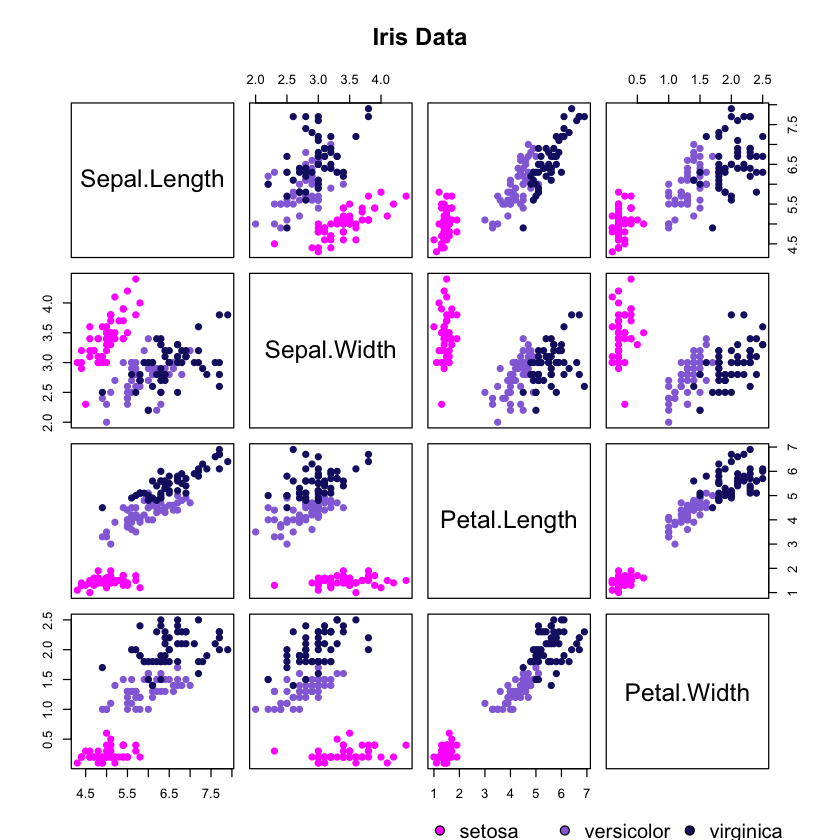

In [3]:
# Custom chosen colours
colours = c('magenta',  'mediumpurple', 'midnightblue')

# Plotting
pairs(iris[1:4], main = "Iris Data", pch = 19, 
      col = colours[unclass(iris$Species)], labels = colnames(iris))


# adding legend
par(xpd=TRUE)
legend(x= 0.5, y = 0, levels(iris$Species), pt.bg = colours,
       pch = 21, bty = "n", ncol = 3)

PCA is used to create linear combinations of the original data that capture as much information in the original data as possible. 
We will use the `prcomp` function.

* If we work with standardized data (mean 0 std 1) we need to calculate the principal components through correlation matrix.

* If we work with raw data we need to calculate the principal components through the covariance matrix. 

It is good practice to standardize our variables when these have different units and have very different variances. If they are in the same units either of the alteratives is appropriate.

In our example all variables are measured in centimetres but we will use the correlation matrix for simplicity’s sake.

First, we are going to examine the variability of all the numeric values

In [4]:
sapply(iris[1:4],var)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
   0.6856935    0.1899794    3.1162779    0.5810063

In [5]:
range(sapply(iris[1:4],var))

[1] 0.1899794 3.1162779

Maybe this range of variability is big in this context.
Thus, we will use the correlation matrix
For this, we must standardize our variables using the  `scale()` function:

In [6]:
iris.stand <- as.data.frame(scale(iris[,1:4]))
sapply(iris.stand,sd) #now, standard deviations are 1

#sapply(iris.stand,mean) #now, standard deviations are 1



Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
           1            1            1            1

If we use the `prcomp()` function, we indicate `scale=TRUE` to use the correlation matrix.

In [7]:
pca <- prcomp(iris.stand, scale = T)

#similar with princomp(): princomp(iris.stand, cor=T)
pca

Standard deviations:
[1] 1.7083611 0.9560494 0.3830886 0.1439265

Rotation:
                    PC1         PC2        PC3        PC4
Sepal.Length  0.5210659 -0.37741762  0.7195664  0.2612863
Sepal.Width  -0.2693474 -0.92329566 -0.2443818 -0.1235096
Petal.Length  0.5804131 -0.02449161 -0.1421264 -0.8014492
Petal.Width   0.5648565 -0.06694199 -0.6342727  0.5235971

In [8]:
summary(pca)

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7084 0.9560 0.38309 0.14393
Proportion of Variance 0.7296 0.2285 0.03669 0.00518
Cumulative Proportion  0.7296 0.9581 0.99482 1.00000

This gives us the standard deviation of each component, and the proportion of variance explained by each component.
The standard deviation is stored in (see `str(pca)`):

In [9]:
pca$sdev

[1] 1.7083611 0.9560494 0.3830886 0.1439265

Usually the trend is to select up to 3 components (for visualization purposes) but we can have an indication on how many principal components should be retained. 

Usually a scree plot helps making a decision. In R we can use the `screeplot()` function:

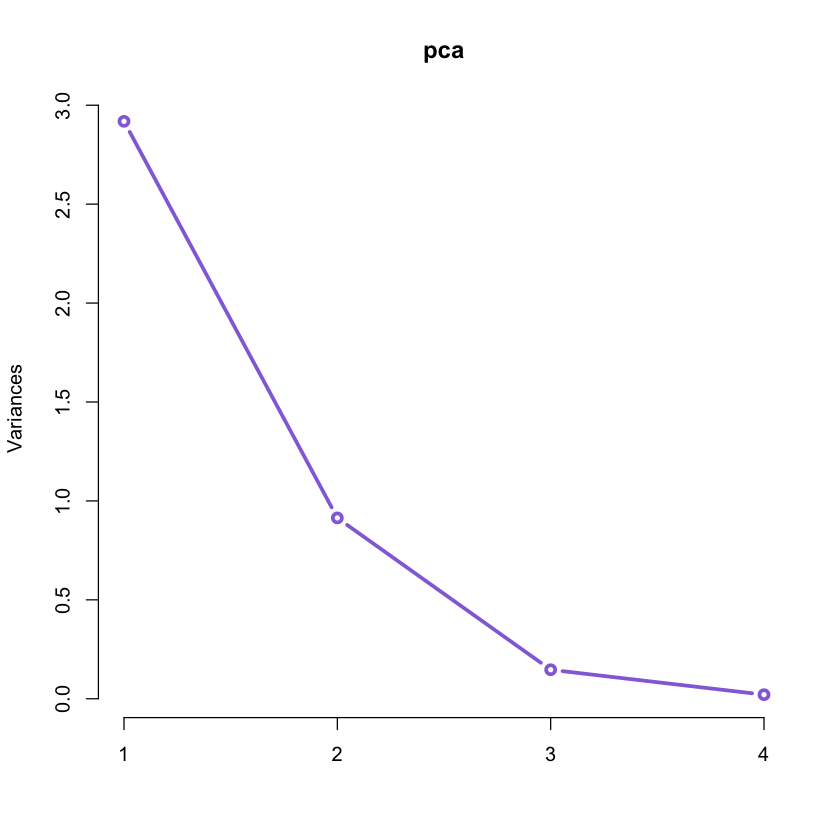

In [10]:
#plot of variance of each PCA.
#It will be useful to decide how many principal components should be retained.
screeplot(pca, type = "lines", col = 'mediumpurple', lwd = 3)

This plot together with the values of the Proportion of Variance and Cumulative Proportion obtained by means of `summary(pca)` suggests that we can retain just the first 2 components accounting for over 95% of the variation in the original data!


In [11]:
#retreive loadings for the principal components:
pca$rotation # when using princomp(): pca$loadings

,PC1,PC2,PC3,PC4
Sepal.Length,0.5210659,-0.37741762,0.7195664,0.2612863
Sepal.Width,-0.2693474,-0.92329566,-0.2443818,-0.1235096
Petal.Length,0.5804131,-0.02449161,-0.1421264,-0.8014492
Petal.Width,0.5648565,-0.06694199,-0.6342727,0.5235971


The weights of the PC1 are all similar but the one associated to Sepal.Width variable (it is negative).
This one principal component accounts for over 72% of the variability in the data.

All weights on the second principal component are negative. Thus the PC2 might seem considered as an overall size measurement.  This component explain the 23% of the variability.


The following figure show the first two components and the observations on the same diagram, which helps to interpret the factorial axes while looking at observations location.


The first component discriminate on one side the Sepal.Width and on the other side the rest of variables (see biplot).
According to the second component, When the iris has larger sepal and petal values than average, the PC2 will be smaller than average.

In [12]:
unique(iris$Species)
as.numeric(unique(iris$Species))+1

[1] setosa     versicolor virginica 
Levels: setosa versicolor virginica

[1] 2 3 4

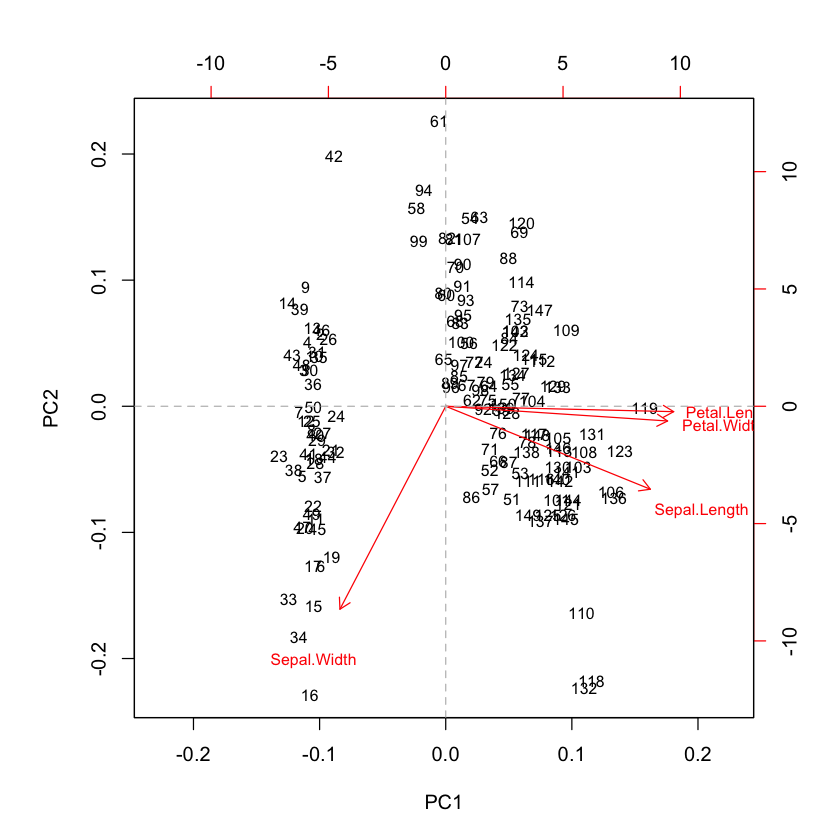

In [13]:
# biplot of first two principal components
biplot(pca, cex = 0.8)
abline(h = 0, v = 0, lty = 2, col = 8)

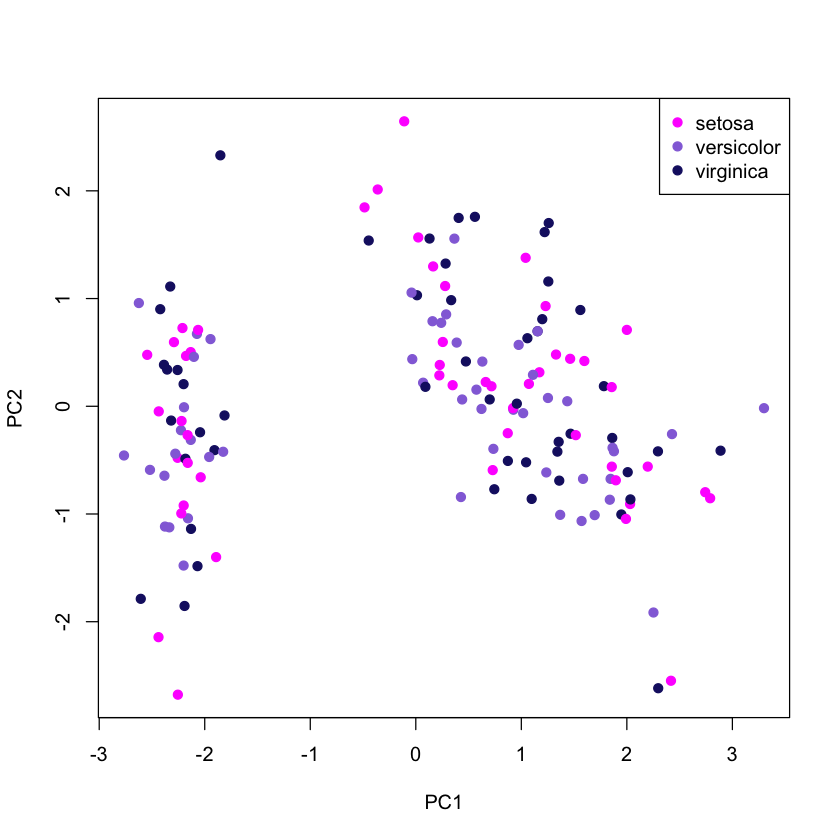

In [14]:
plot(pca$x, col = colours, pch = 19)

legend("topright", legend = unique(iris$Species), col = colours, pch= 19)

# 2. TSNE and comparison with PCA

The t-Distributed Stochastic Neighbor Embedding (t-SNE algorithm), by Laurens van der Maaten and Geoffrey Hinton, is a NON LINEAR dimensionality reduction algorithm.
It enebles to represent high-dimensional data in two or three dimensions and allows visualization via scatter plots.

Barnes-Hut-SNE is a further improvement of the algorithm by Laurens van der Maaten, which uses Barnes-Hut approximations to significantly improve computational speed (O(N log N) instead of O(N2)). This makes it feasible to apply the algorithm to larger data sets.

We will follow the example proposed oh github https://github.com/lmweber/Rtsne-example using "Rtsne", a package by Jesse Krijthe provides an R wrapper function for the C++ implementation of the Barnes-Hut-SNE algorithm.

The data set used in this example is the healthy human bone marrow data set "Marrow1".

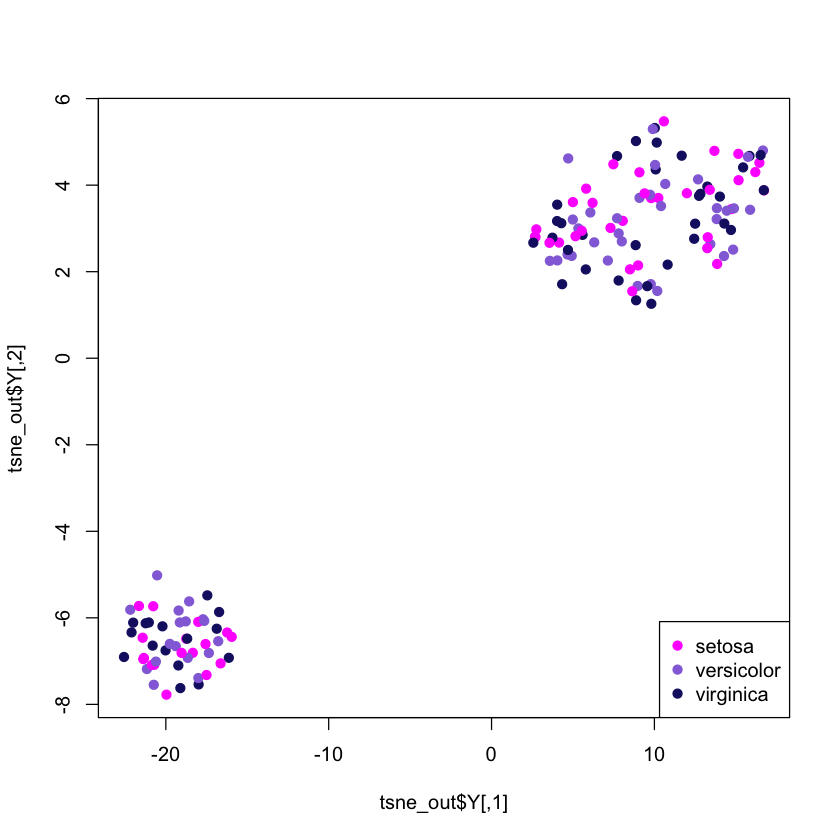

In [16]:
# fist of all, just as an example, apply tsne on the IRIS dataset
library(Rtsne) # Load package
iris_unique <- unique(iris) # Remove duplicates
set.seed(42) # Sets seed for reproducibility
tsne_out <- Rtsne(as.matrix(iris_unique[,1:4])) # Run TSNE

plot(tsne_out$Y , col = colours, pch= 19) # Plot the result

legend("bottomright", legend = unique(iris$Species), col = colours, pch = 19)




Here we will follow  the example on GITHUB  https://github.com/lmweber/Rtsne-example.
The Marrow1 dataset is made of cells from different cell populations (types). We will see how tsne will be able to  group them as distinct clusters of points in the 2-dimensional projection. There is clear visual separation between clusters. Amir et al. (2013) also independently verified the interpretation of the clusters using "manual gating" methods (visual inspection of 2-dimensional scatter plots), confirming that several clusters represent well-known cell types from immunology.

In [17]:
#install flowCore package from Bioconductor (to read FCS files)
source("https://bioconductor.org/biocLite.R")
biocLite("flowCore")

# install Rtsne package from CRAN (R implementation of Barnes-Hut-SNE algorithm)

install.packages("Rtsne")

# load packages

library(flowCore)


Bioconductor version 3.4 (BiocInstaller 1.24.0), ?biocLite for help
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.4 (BiocInstaller 1.24.0), R 3.3.2 (2016-10-31).
Installing package(s) ‘flowCore’



The downloaded binary packages are in
	/var/folders/1q/xdx6qpy905dbx01t7cfv36280000gn/T//Rtmp3sJ0lF/downloaded_packages


Old packages: 'assertthat', 'cluster', 'curl', 'DBI', 'expm', 'jsonlite',
  'lattice', 'Matrix', 'mgcv', 'mvtnorm', 'nlme', 'repr', 'rmarkdown',
  'stringi', 'survival', 'tibble'



The downloaded binary packages are in
	/var/folders/1q/xdx6qpy905dbx01t7cfv36280000gn/T//Rtmp3sJ0lF/downloaded_packages


Warning message:
“package ‘flowCore’ was built under R version 3.3.3”

In [18]:
getwd()

[1] "/Volumes/apilolli/tania/Documents/Git_Repos/BAD_days/Day2/BAD_DAY2"

In [19]:
data <- exprs(read.FCS("./Rtsne-example-master/data/visne_marrow1.fcs", transformation = FALSE))
head(data)

unname(colnames(data))  # isotope and marker (protein) names


the text section does not end with delimiter: \\. The last keyword is dropped.
the text section does not end with delimiter: \\. The last keyword is dropped.


Event#,Time,Cell Length,191-DNA,193-DNA,115-CD45,"110,111,112,114-CD3",139-CD45RA,141-pPLCgamma2,142-CD19,⋯,166-IkBalpha,167-CD38,168-pH3,170-CD90,169-pP38,171-pBtk/Itk,172-pS6,174-pSrcFK,176-pCREB,175-pCrkL
22933,42448,14.39525,321.2244,434.9970,142.39886,18.5329704,117.579620,4.8356605,50.8025017,⋯,2.019981,32.1595116,14.3242693,8.78977966,53.843872,82.910294,6.8211913,5.774820,12.3001671,1.4769655
228744,667323,41.27012,209.3467,563.6180,50.66235,0.2076987,19.171650,-1.3943130,10.0177841,⋯,4.779097,-0.5546998,1.5282539,-0.26177970,17.979921,1.054635,5.0797348,7.080018,-1.7290312,-1.0569905
230819,549730,28.91957,829.5733,1408.7177,503.61078,294.2422791,5.135233,0.8516778,-0.1638297,⋯,12.946030,47.7583084,18.4628849,0.54432803,37.236912,38.177971,79.4033279,2.626387,23.7090988,-1.4266791
131780,359184,26.11232,643.0649,992.3835,178.37289,359.2935181,79.340591,-0.2172089,5.7050629,⋯,24.191151,49.7774315,5.1872330,-0.07430215,6.879214,11.992647,-0.2527083,9.006838,-0.6766897,-0.4470886
32212,56694,36.61685,713.0907,1131.0656,34.13390,-12.1336746,1.377896,3.1527698,-0.2193382,⋯,3.426270,42.7431793,-0.8187979,9.73161793,10.562280,26.534126,-0.7640409,50.811363,16.6444397,3.9240763
403958,834589,29.39848,638.0286,968.7856,288.91412,65.9604187,6.649710,-0.7853550,-1.4377729,⋯,1.359477,89.9450684,15.9464016,3.46092296,4.090930,51.456581,7.6963782,28.520178,5.2173581,-0.3729125


[1] "Event#"              "Time"                "Cell Length"        
 [4] "191-DNA"             "193-DNA"             "115-CD45"           
 [7] "110,111,112,114-CD3" "139-CD45RA"          "141-pPLCgamma2"     
[10] "142-CD19"            "144-CD11b"           "145-CD4"            
[13] "146-CD8"             "148-CD34"            "150-pSTAT5"         
[16] "147-CD20"            "152-Ki67"            "154-pSHP2"          
[19] "151-pERK1/2"         "153-pMAPKAPK2"       "156-pZAP70/Syk"     
[22] "158-CD33"            "160-CD123"           "159-pSTAT3"         
[25] "164-pSLP-76"         "165-pNFkB"           "166-IkBalpha"       
[28] "167-CD38"            "168-pH3"             "170-CD90"           
[31] "169-pP38"            "171-pBtk/Itk"        "172-pS6"            
[34] "174-pSrcFK"          "176-pCREB"           "175-pCrkL"

In [20]:
# select markers to use in calculation of t-SNE projection
# CD11b, CD123, CD19, CD20, CD3, CD33, CD34, CD38, CD4, CD45, CD45RA, CD8, CD90
# (see Amir et al. 2013, Supplementary Tables 1 and 2)

colnames_proj <- unname(colnames(data))[c(11, 23, 10, 16, 7, 22, 14, 28, 12, 6, 8, 13, 30)]
colnames_proj  # check carefully!


# arcsinh transformation
# (see Amir et al. 2013, Online Methods, "Processing of mass cytometry data")

asinh_scale <- 5
data <- asinh(data / asinh_scale)  # transforms all columns! including event number etc


# subsampling

nsub <- 10000
set.seed(123)  # set random seed
data <- data[sample(1:nrow(data), nsub), ]

dim(data)

[1] "144-CD11b"           "160-CD123"           "142-CD19"           
 [4] "147-CD20"            "110,111,112,114-CD3" "158-CD33"           
 [7] "148-CD34"            "167-CD38"            "145-CD4"            
[10] "115-CD45"            "139-CD45RA"          "146-CD8"            
[13] "170-CD90"

[1] 10000    36

In [21]:
# prepare data for Rtsne

data <- data[, colnames_proj]      # select columns to use
data <- data[!duplicated(data), ]  # remove rows containing duplicate values within rounding

dim(data)

[1] 9902   13

In [22]:
# Exporting the subsample data in TXT format

file <- paste("./Rtsne-example-master/data/viSNE_Marrow1_nsub", nsub,".txt", sep = "")
write.table(data, file = file, row.names = FALSE, quote = FALSE, sep = "\t")




Running the Rtsne (Barnes-Hut_SNE algorithm) without PCA step (see Amir et al. 2013, Online Methods, "viSNE analysis")

In [24]:
set.seed(123)  # set random seed
rtsne_out <- Rtsne(as.matrix(data), pca = FALSE, verbose = TRUE)

Read the 9902 x 13 data matrix successfully!
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Normalizing input...
Building tree...
 - point 0 of 9902
Done in 1.55 seconds (sparsity = 0.013168)!
Learning embedding...
Iteration 50: error is 96.659673 (50 iterations in 3.91 seconds)
Iteration 100: error is 85.398883 (50 iterations in 3.88 seconds)
Iteration 150: error is 81.857030 (50 iterations in 3.82 seconds)
Iteration 200: error is 81.237886 (50 iterations in 3.81 seconds)
Iteration 250: error is 81.063627 (50 iterations in 3.86 seconds)
Iteration 300: error is 3.179002 (50 iterations in 3.70 seconds)
Iteration 350: error is 2.840285 (50 iterations in 3.39 seconds)
Iteration 400: error is 2.660414 (50 iterations in 3.48 seconds)
Iteration 450: error is 2.542222 (50 iterations in 3.47 seconds)
Iteration 500: error is 2.458186 (50 iterations in 3.44 seconds)
Iteration 550: error is 2.393793 (50 iterations in 3.48 seconds)
Iteration 600: er

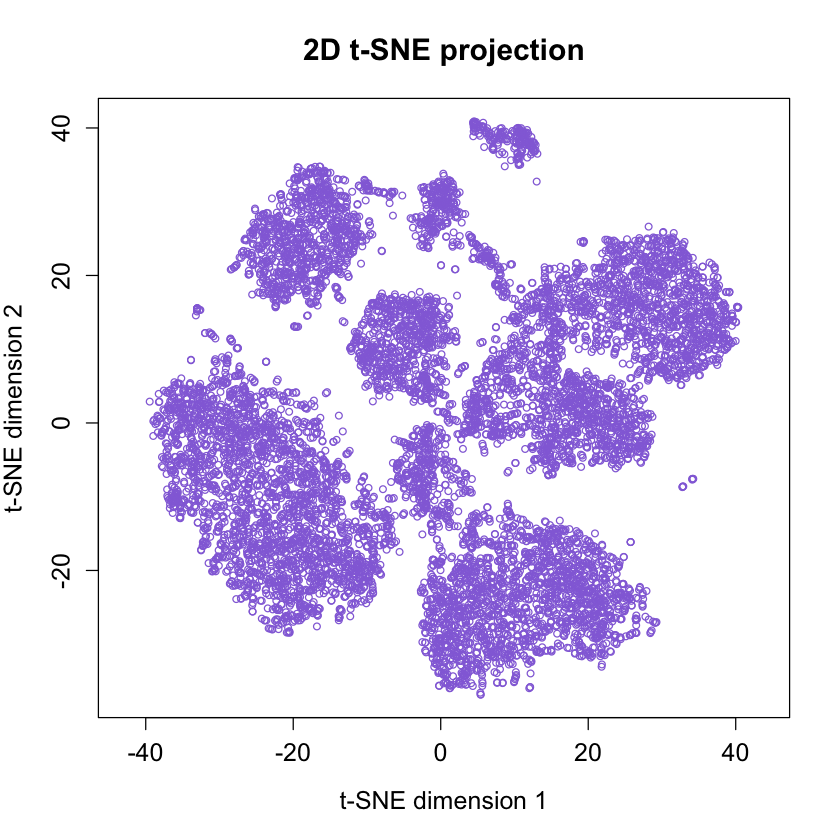

In [34]:
# plot 2D t-SNE projection

# Uncomment the lines below if you want to save to a separate .PNG file
# file_plot <- paste("./Rtsne-example-master/plots/Rtsne_viSNE_Marrow1_nsub", nsub, ".png", sep = "")
# png(file_plot, width = 900, height = 900)

plot(rtsne_out$Y, asp =1, pch = 21, col = 'mediumpurple', 
     cex = 0.75, cex.axis = 1.25, cex.lab = 1.25, cex.main = 1.5, 
     xlab = "t-SNE dimension 1", ylab = "t-SNE dimension 2", 
     main = "2D t-SNE projection")


#dev(off)

### Compare to PCA 

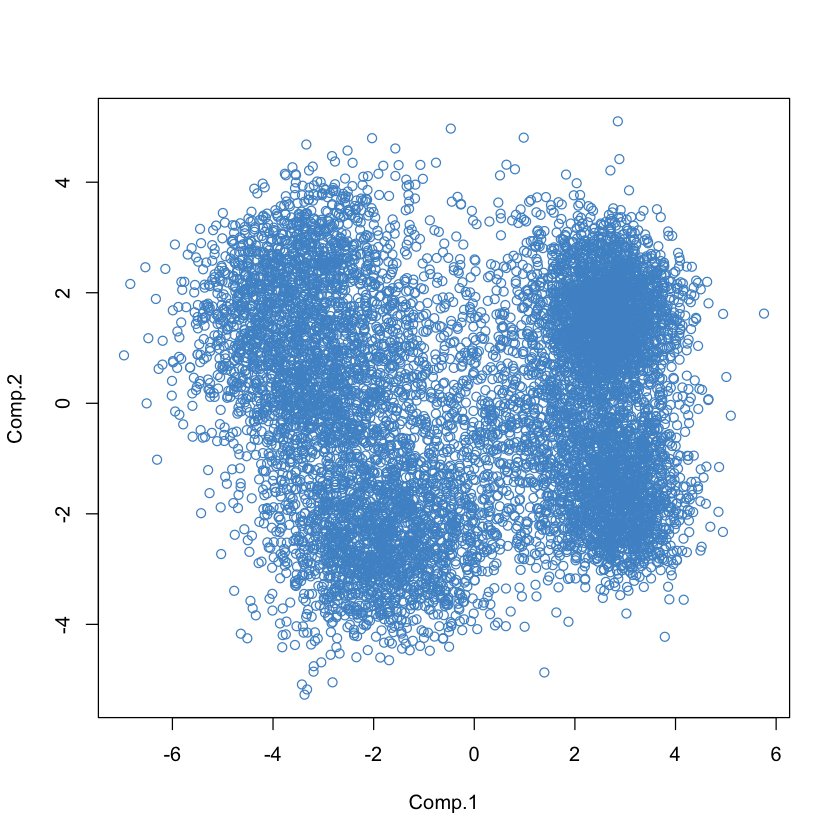

In [36]:
pca_data = princomp(as.matrix(data))$scores[,1:2]
plot(pca_data, col= 'steelblue3')

#text(pca_iris, labels=iris$Species,col=colors[iris$Species])

# ABOUT THE INTERPRETATION OF TSNE
SOME EXAMPLES FROM https://gist.github.com/mikelove/74bbf5c41010ae1dc94281cface90d32
on the delicate interpretation of tsne when the underlyng structure of the data is LINEAR

Explore tsne on linear data. First install (if needed) and load the required packages.

In [40]:
library(rafalib)
library(RColorBrewer)
library(Rtsne)
library(tsne)
library(pracma)
library(Cairo)

ERROR: Error in library(pracma): there is no package called ‘pracma’


In [42]:
par(mfrow=c(1, 2))

for (i in 2:5) {
  set.seed(i)
  x <- runif(n, -1, 1)
  cols <- brewer.pal(11, "Spectral")[as.integer(cut(x, 11))]
  ortho <- rortho(m)
  X <- cbind(x, matrix(0,ncol=m-1,nrow=n)) %*% ortho
  res <- tsne(X)
  plot(res, col=cols, pch=20, xlab="", ylab="", main="tsne")
  res <- Rtsne(X)
  plot(res$Y, col=cols, pch=20, xlab="", ylab="", main="Rtsne")
}

ERROR: Error in runif(n, -1, 1): object 'n' not found


In [ ]:
n <- 200
m <- 40
set.seed(1)
x <- runif(n, -1, 1)
library(rafalib)
bigpar(2,2,mar=c(3,3,3,1))
library(RColorBrewer)
cols <- brewer.pal(11, "Spectral")[as.integer(cut(x, 11))]
plot(x, rep(0,n), ylim=c(-1,1), yaxt="n", xlab="", ylab="",
col=cols, pch=20, main="underlying data")
library(pracma)
ortho <- rortho(m)
X <- cbind(x, matrix(0,ncol=m-1,nrow=n)) %*% ortho
plot(X[,1:2], asp=1, col=cols, pch=20, xlab="", ylab="", main="embed in higher dim")
pc <- prcomp(X)
plot(pc$x[,1:2], asp=1, col=cols, pch=20, xlab="", ylab="", main="PC1 & PC2")
library(tsne)
res <- tsne(X)
plot(res, col=cols, pch=20, xlab="", ylab="", main="t-SNE")
bigpar(2,2,mar=c(3,3,1,1))
for (i in 2:5) {
set.seed(i)
x <- runif(n, -1, 1)
cols <- brewer.pal(11, "Spectral")[as.integer(cut(x, 11))]
ortho <- rortho(m)
X <- cbind(x, matrix(0,ncol=m-1,nrow=n)) %*% ortho
res <- tsne(X)
plot(res, col=cols, pch=20, xlab="", ylab="")
}